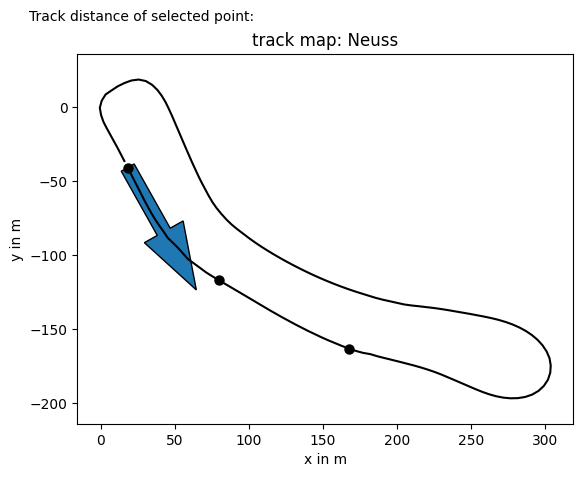

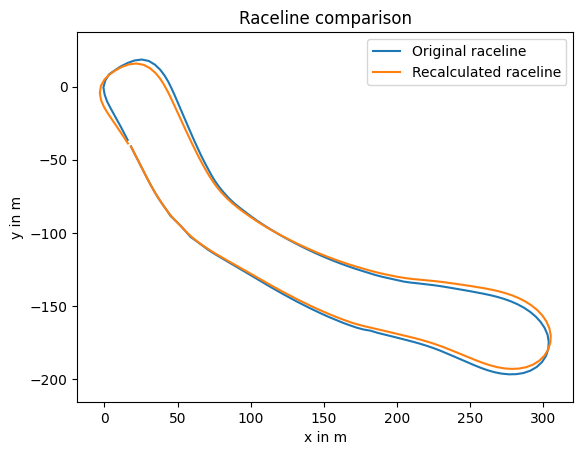

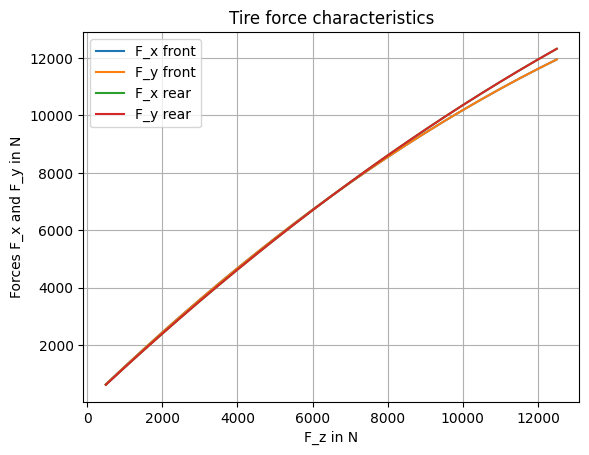

--------------------------------------------------
Starting solver run (1)
Starting solver run (2) (considering new start velocity)
Starting recalculation considering hybrid system (1)
Finished solver calculations


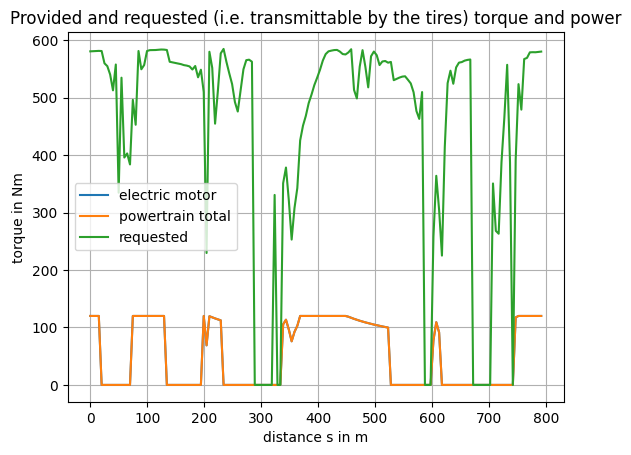

<Figure size 640x480 with 0 Axes>

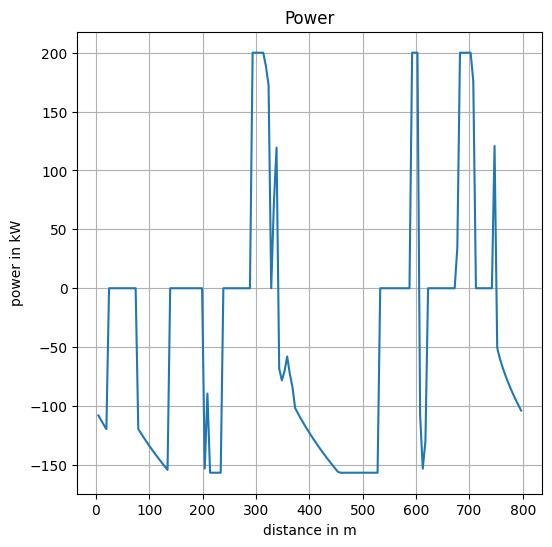

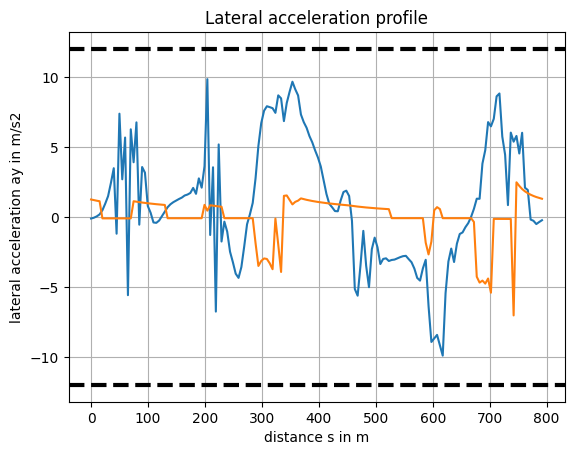

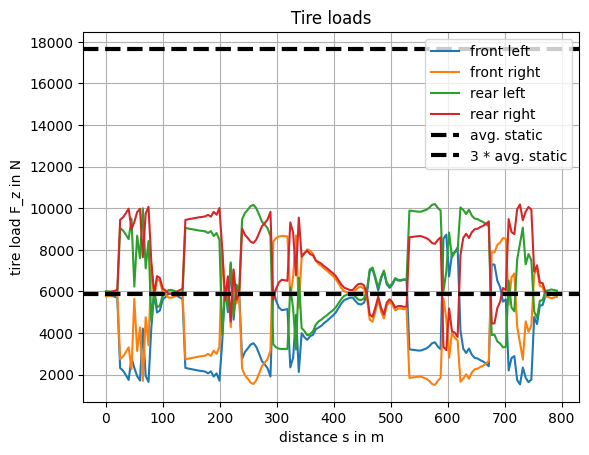

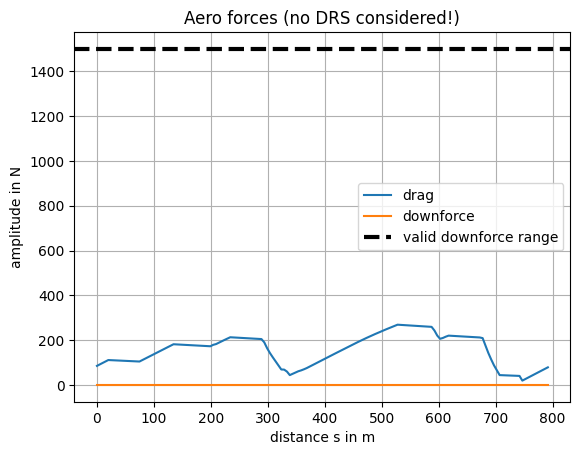

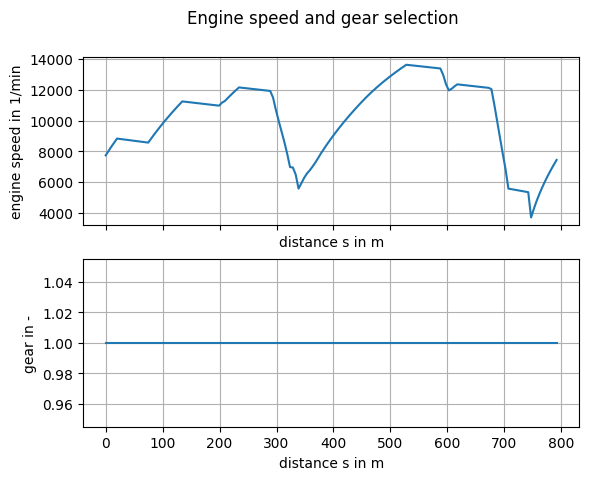

--------------------------------------------------
Forward/Backward Plus Solver
Solver runtime: 1.90 s
--------------------------------------------------
Lap time: 39.926 s
S1: 5.358 s  |  S2: 4.276 s  |  S3: 30.293 s
--------------------------------------------------
Start velocity: 59.3 km/h
Final velocity: 59.3 km/h
Delta: 0.0 km/h
--------------------------------------------------
Length of lap: 0.80 km
Average velocity: 71.85 km/h
Consumption with and without regen: 1342.49 kJ/lap | 2249.05 kJ/lap
Consumption with and without regen: 0.37 kWh/lap | 0.62 kWh/lap
Consumption avg: 46.80 kWh/100km
--------------------------------------------------


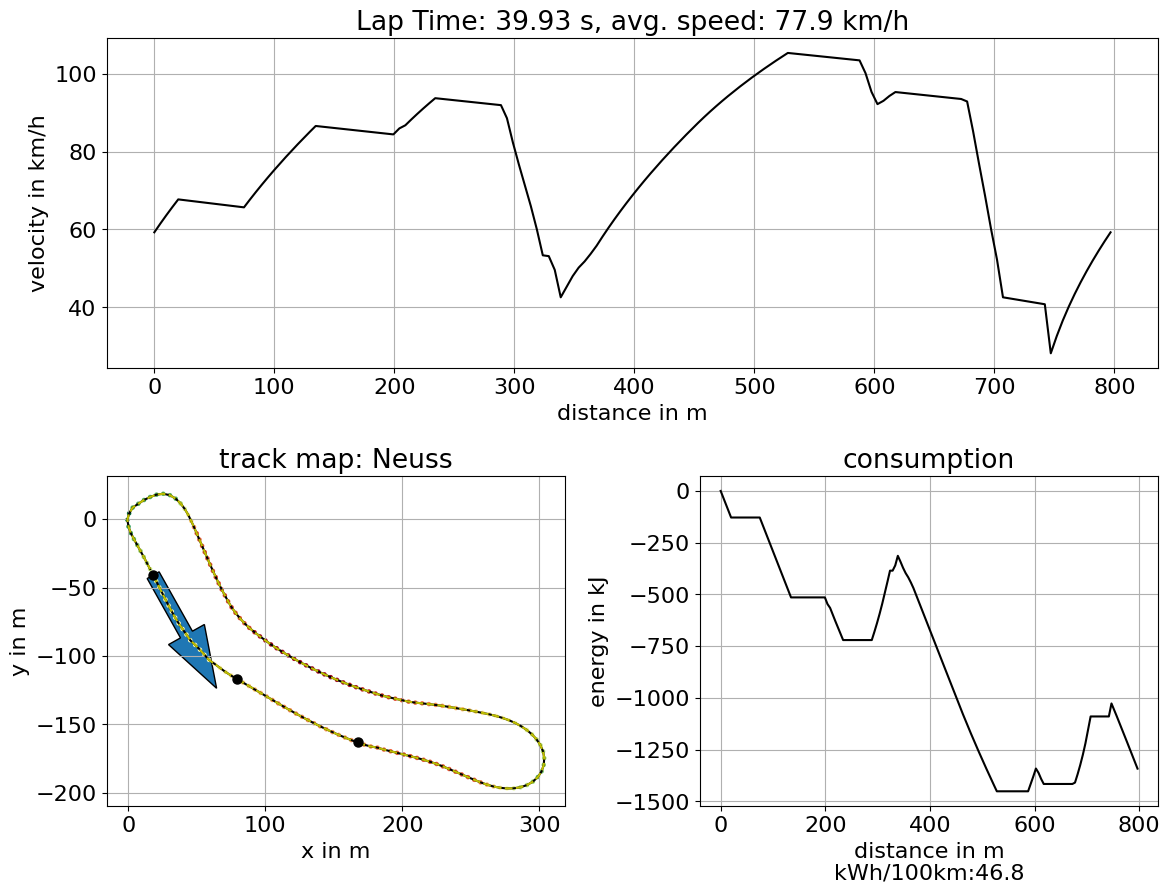

Runtime: 3.19 seconds


In [2]:
import laptimesim.src
import main_laptimesim  as mls
import time

#%run main_laptimesim.py

track_opts_ = {"trackname": "Neuss",
                "flip_track": False,
                "mu_weather": 1.0,
                "interp_stepsize_des": 5.0,
                "curv_filt_width": 10.0,
                "use_drs1": False,
                "use_drs2": False,
                "use_pit": False}

# solver options ---------------------------------------------------------------------------------------------------
# vehicle:                  vehicle parameter file
# series:                   F1, FE
# limit_braking_weak_side:  can be None, 'FA', 'RA', 'all' -> set if brake force potential should be determined
#                           based on the weak (i.e. inner) side of the car, e.g. when braking into a corner
# v_start:                  [m/s] velocity at start
# find_v_start:             determine the real velocity at start
# max_no_em_iters:          maximum number of iterations for EM recalculation
# es_diff_max:              [J] stop criterion -> maximum difference between two solver runs

solver_opts_ = {"vehicle": "BEV_Taycan.ini",
                "series": "FE",
                "limit_braking_weak_side": 'all',
                "v_start": 10.0 / 3.6,
                "find_v_start": True,
                "max_no_em_iters": 10,
                "es_diff_max": 1.0}

# driver options ---------------------------------------------------------------------------------------------------
# vel_subtr_corner: [m/s] velocity subtracted from max. cornering vel. since drivers will not hit the maximum
#                   perfectly
# vel_lim_glob:     [m/s] velocity limit, set None if unused
# yellow_s1:        yellow flag in sector 1
# yellow_s2:        yellow flag in sector 2
# yellow_s3:        yellow flag in sector 3
# yellow_throttle:  throttle position in a yellow flag sector
# initial_energy:   [J] initial energy (F1: max. 4 MJ/lap, FE Berlin: 4.58 MJ/lap)
# em_strategy:      FCFB, LBP, LS, NONE -> FCFB = First Come First Boost, LBP = Longest (time) to Breakpoint,
#                   LS = Lowest Speed, FE requires FCFB as it only drives in electric mode!
# use_recuperation: set if recuperation by e-motor and electric turbocharger is allowed or not (lift&coast is
#                   currently only considered with FCFB)
# use_lift_coast:   switch to turn lift and coast on/off
# lift_coast_dist:  [m] lift and coast before braking point

driver_opts_ = {"vel_subtr_corner": 10/3.6,
                "vel_lim_glob": 80.0 /3.6,
                "yellow_s1": True,
                "yellow_s2": True,
                "yellow_s3": True,
                "yellow_throttle": 0.3,
                "initial_energy": 0.0e6,
                "em_strategy": "FCFB",
                "use_recuperation": True,
                "use_lift_coast": True,
                "lift_coast_dist":50.0} # 200m ist je nach Kurve auch etwas viel

# sensitivity analysis options -------------------------------------------------------------------------------------
# use_sa:   switch to deactivate sensitivity analysis
# sa_type:  'mass', 'aero', 'cog'
# range_1:  range of parameter variation [start, end, number of steps]
# range_2:  range of parameter variation [start, end, number of steps] -> CURRENTLY NOT IMPLEMENTED

sa_opts_ = {"use_sa": False,
            "sa_type": "mass",
            "range_1": [2380.0, 2460.0, 5],
            "range_2": None}

# debug options ----------------------------------------------------------------------------------------------------
# use_plot:                 plot results
# use_debug_plots:          plot additional plots for debugging
# use_plot_comparison_tph:  calculate velocity profile with TPH FB solver and plot a comparison
# use_print:                set if prints to console should be used or not (does not suppress hints/warnings)
# use_print_result:         set if result should be printed to console or not

debug_opts_ = {"use_plot": True,
                "use_debug_plots": True,
                "use_plot_comparison_tph": False,
                "use_print": True,
                "use_print_result": True}

# ###  todo list:
# 
# limit recuperation power to xy kw
# lift and coast not working properly     
# plot longitudinal acceleration
# plot resistance including rolling resistance
# plot power over time


start_time = time.time()

result = mls.main(track_opts=track_opts_,
        solver_opts=solver_opts_,
        driver_opts=driver_opts_,
        sa_opts=sa_opts_,
        debug_opts=debug_opts_)

print(f"Runtime: {time.time() - start_time:.2f} seconds")

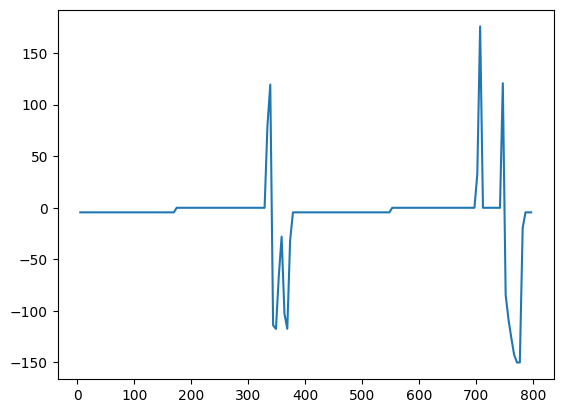

In [13]:
import matplotlib.pyplot as plt
timespans = result.t_cl[1:]-result.t_cl[:-1]
powers = result.es_cl[1:] - result.es_cl[:-1]
kwatts = (powers / timespans)/1000
#plt.plot( result.t_cl[1:] , kwatts)
plt.plot( result.trackobj.dists_cl[1:] , kwatts)

In [8]:
r = result.trackobj.stepsize
r*161


801.7916930805201

In [ ]:
import main_opt_raceline as mor

mor.doit()